# Reproducing the "Where is STEREO Today?" plot

- https://docs.sunpy.org/en/stable/generated/gallery/showcase/where_is_stereo.html

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

import astropy.units as u
from astropy.coordinates import Longitude

from sunpy.coordinates import HeliocentricEarthEcliptic, get_body_heliographic_stonyhurst, get_horizons_coord
from sunpy.time import parse_time

In [ ]:
obstime = parse_time('now')
obstime

<Time object: scale='utc' format='datetime' value=2025-02-16 12:07:24.707175>

In [ ]:
hee_frame = HeliocentricEarthEcliptic(obstime=obstime)

In [ ]:
def get_first_orbit(coord):
    lon = coord.transform_to(hee_frame).spherical.lon
    shifted = Longitude(lon - lon[0])
    ends = np.flatnonzero(np.diff(shifted) < 0)
    if ends.size > 0:
        return coord[:ends[0]]
    return coord

def coord_to_heexy(coord):
    coord = coord.transform_to(hee_frame)
    coord.representation_type = 'cartesian'
    return coord.y.to_value('AU'), coord.x.to_value('AU')

In [ ]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars']
times = obstime + np.arange(700) * u.day
planet_coords = {planet: get_first_orbit(get_body_heliographic_stonyhurst(planet, times))
                 for planet in planets}

stereo_a = get_horizons_coord('STEREO-A', obstime)

missions = ['Parker Solar Probe', 'Solar Orbiter', 'BepiColombo']
mission_labels = {'Parker Solar Probe': 'PSP', 'Solar Orbiter': 'SO', 'BepiColombo': 'BEPICOLOMBO'}
mission_coords = {mission: get_first_orbit(get_horizons_coord(mission, {'start': obstime,
                                                                        'stop': obstime + 1 * u.yr,
                                                                        'step': '1d'}))
                  for mission in missions}

INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for BepiColombo (Spacecraft) (-121) [sunpy.coordinates.ephemeris]


In [ ]:
obstime = parse_time('now')
hee_frame = HeliocentricEarthEcliptic(obstime=obstime)

planets = ['Mercury', 'Venus', 'Earth', 'Mars']
times = obstime + np.arange(700) * u.day
planet_coords = {planet: get_first_orbit(get_body_heliographic_stonyhurst(planet, times))
                 for planet in planets}

stereo_a = get_horizons_coord('STEREO-A', obstime)

missions = ['STEREO-A', 'Parker Solar Probe', 'Solar Orbiter']
# mission_labels = {'Parker Solar Probe': 'PSP', 'Solar Orbiter': 'SO'}
mission_coords = {mission: get_first_orbit(get_horizons_coord(mission, {'start': obstime,
                                                                        'stop': obstime + 90 *u.day,
                                                                        'step': '1d'}))
                  for mission in missions}

INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]


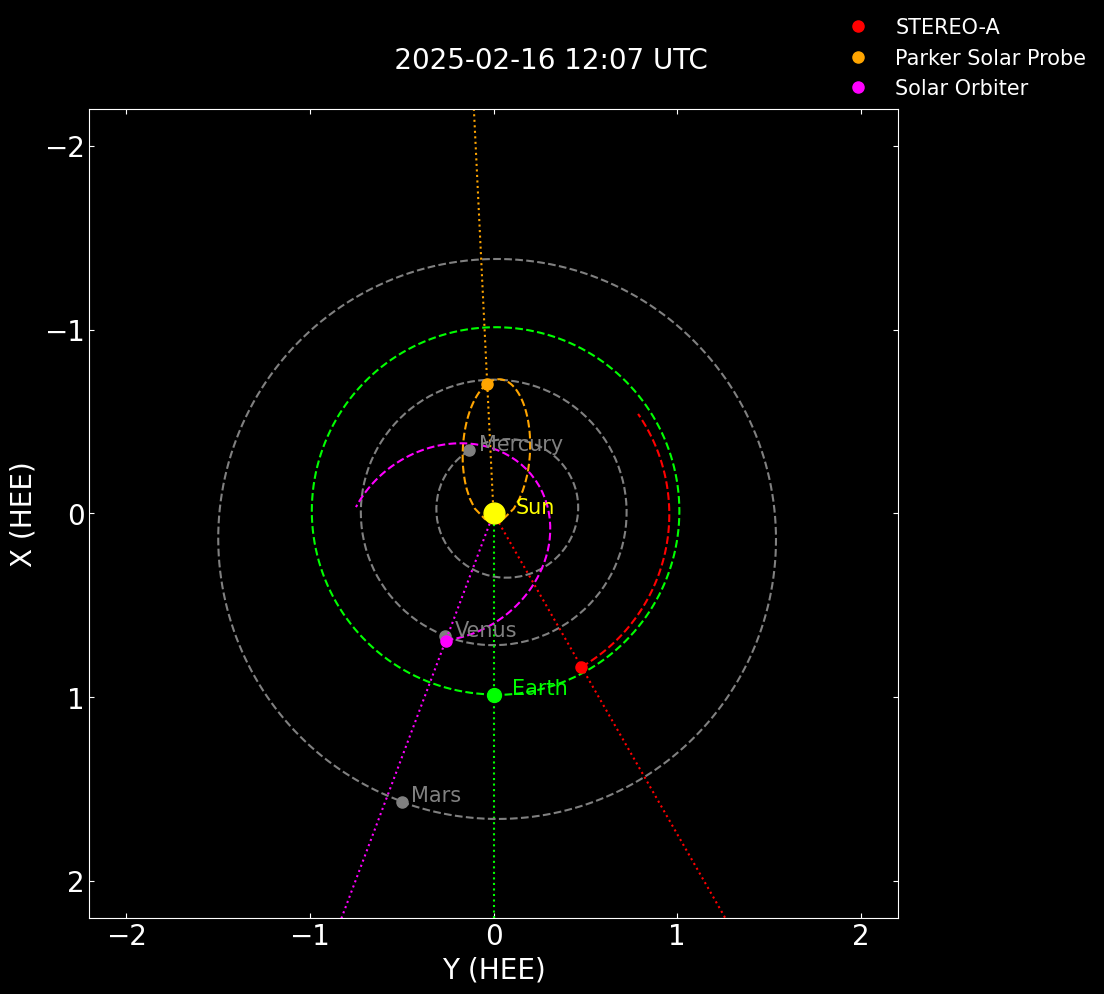

In [ ]:
fig = plt.figure(figsize=(10, 10), facecolor='black')
ax = fig.add_subplot()
fig.patch.set_facecolor('black')  # Set figure background color
ax.set_facecolor('black')  # Set axes background color
ax.spines['bottom'].set_color('white')  # Set edge color
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')
ax.xaxis.label.set_color('white')     # Set X-axis label color
ax.yaxis.label.set_color('white')     # Set Y-axis label color
ax.title.set_color('white')           # Set title color
ax.tick_params(axis='x', colors='white', direction='in', top=True)  # X-axis ticks
ax.tick_params(axis='y', colors='white', direction='in', right=True)  # Y-axis ticks

#----------------------------------------------------------------
ax.set_xlim(-2.2, 2.2)
ax.set_xlabel('Y (HEE)', fontsize=20)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(2.2, -2.2)
ax.set_ylabel('X (HEE)', fontsize=20)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_title(f"""
             {obstime.strftime('%Y-%m-%d %H:%M UTC')}
             """, fontsize=20)
ax.set_aspect('equal')
#----------------------------------------------------------------
# ax.plot([0, 0], [0, 2.2], linestyle='dotted', color='lime')
#----------------------------------------------------------------
for planet, coord in planet_coords.items():

    x, y = coord_to_heexy(coord[0])
    if planet == 'Earth':
        color, markersize, offset = 'lime', 10, 0.1
        ax.plot([0, 5*x], [0, 5*y], linestyle='dotted', color=color)
    else:
        color, markersize, offset = 'gray', 8, 0.05

    ax.plot(*coord_to_heexy(coord), linestyle='dashed', color=color)
    ax.plot(x, y, 'o', markersize=markersize, color=color)
    ax.text(x + offset, y, planet, color=color, fontsize=15)
#----------------------------------------------------------------
# x, y = coord_to_heexy(stereo_a)
# ax.plot([0, 5*x], [0, 5*y], linestyle='dotted', color='gray')
# ax.plot(x, y, 'o', color='red', markersize=8, label='STEREO-A')
# ax.text(x + 0.1, y, 'A', color='red', fontsize=20)
#----------------------------------------------------------------

#----------------------------------------------------------------
for mission, coord in mission_coords.items():

    if mission == 'Solar Orbiter':
        color = 'magenta'
    elif mission == 'Parker Solar Probe':
        color = 'orange'
    elif mission == 'STEREO-A':
        color = 'red'

    x, y = coord_to_heexy(coord[0])
    ax.plot([0, 5*x], [0, 5*y], linestyle='dotted', color=color)
    ax.plot(*coord_to_heexy(coord), linestyle='dashed', color=color)
    ax.plot(x, y, 'o', color=color, label=mission, markersize=8)
#----------------------------------------------------------------
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.plot(0, 0, 'o', markersize=15, color='yellow')
ax.text(0.12, 0, 'Sun', color='yellow', fontsize=15)

fig.tight_layout()
fig.legend(loc='upper right', fontsize=15, bbox_to_anchor=(1.15, 1), facecolor='black', labelcolor='white', frameon=False)
plt.show()